**Actividad Semanal 5**

**Ciencia y Analítica de Datos**


**Profesora: María de la Paz Rico Fernández**


**Alumno: Diego Guerra**


**Matrícula: A01793499**

**27-10-2022**

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [22]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)

B= np.dot(np.dot(W, D), Winv)

print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [61]:
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)
print(values) #D
print(vectors) #W

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]


In [63]:
#Matriz 1
A1 = array ([[3, 0, 2], [3,0, -2], [0,1,1]])
print ('Matriz Original A1')
print (A1)
print ('--------------')
values, vectors = eig(A1)

print('eigenvalores\n' ,values)
print ('eigenvectores\n', vectors)
print ('--------------')

D, W = np.linalg.eig(A1)
Winv = np.linalg.inv(W)
D = np.diag(D)

print ('Matriz Reconstruida')

B1 = np.real(np.round(np.dot(np.dot(W, D), Winv))) #Los vectores y eigenvalores son números imaginarios, con este comando los transformamos a reales y recuperamos la matriz original
print(B1)

Matriz Original A1
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
--------------
eigenvalores
 [3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
eigenvectores
 [[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
--------------
Matriz Reconstruida
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]


In [59]:
#Matriz 2
A2 = array ([[1, 3, 8], [2,0, 0], [0,0,1]])
print ('Matriz Original A2')
print (A2)
print ('--------------')
values, vectors = eig(A2)

print('eigenvalores\n' ,values)
print ('eigenvectores\n', vectors)
print ('--------------')

D, W = np.linalg.eig(A2)
Winv = np.linalg.inv(W)
D = np.diag(D)

print ('Matriz Reconstruida')

B2 = np.round(np.dot(np.dot(W, D), Winv))
print(B2)

Matriz Original A2
[[1 3 8]
 [2 0 0]
 [0 0 1]]
--------------
eigenvalores
 [ 3. -2.  1.]
eigenvectores
 [[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
--------------
Matriz Reconstruida
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]


In [60]:
#Matriz 3
A3 = array ([[5, 4, 0], [1,0, 1], [10,7,1]])
print ('Matriz Original A3')
print (A3)
print ('--------------')
values, vectors = eig(A3)

print('eigenvalores\n' ,values)
print ('eigenvectores\n', vectors)
print ('--------------')

D, W = np.linalg.eig(A3)
Winv = np.linalg.inv(W)
D = np.diag(D)

print ('Matriz Reconstruida')

B3 = np.round(np.dot(np.dot(W, D), Winv))

print(B3)

Matriz Original A3
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
--------------
eigenvalores
 [ 6.89167094 -0.214175   -0.67749594]
eigenvectores
 [[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
--------------
Matriz Reconstruida
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


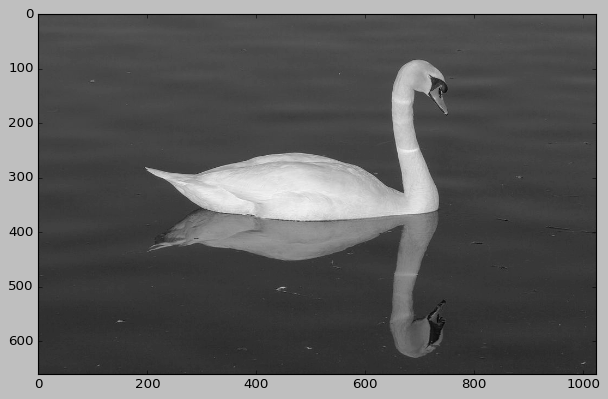

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FDFA23BED10>


In [82]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [83]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [84]:
U.shape

(660, 660)

In [85]:
V.shape

(1024, 1024)

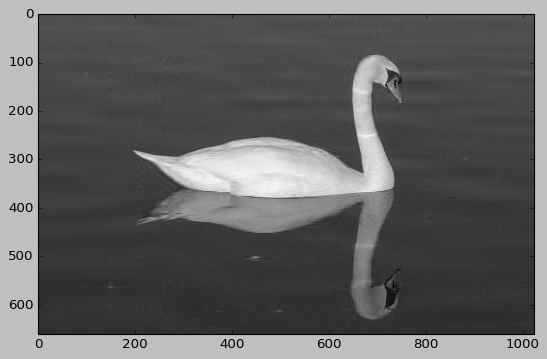

Felicidades la imagen está comprimida


In [93]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[43. 43. 43. ... 41. 41. 42.]


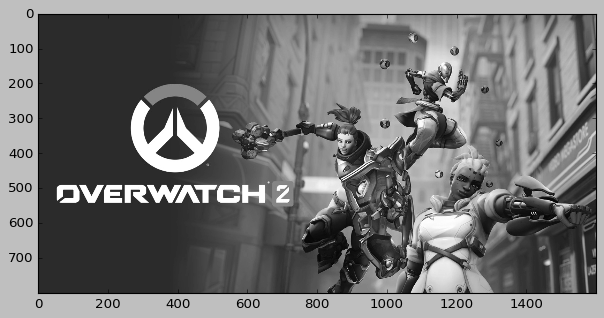

<PIL.Image.Image image mode=LA size=1600x800 at 0x7FDFA1F15B10>


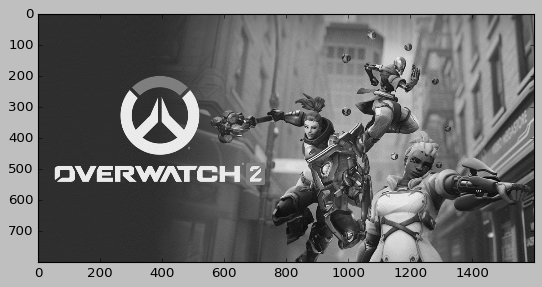

In [123]:
#imagen 1
img1 = Image.open(urllib.request.urlopen('https://fs-prod-cdn.nintendo-europe.com/media/images/10_share_images/games_15/nintendo_switch_download_software_1/2x1_NSwitchDS_Overwatch2WatchpointPack_image1600w.jpg')).convert('LA')
imggray = img1.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)
print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap = 'gray')
plt.show()
print(img1)

U,D,V = np.linalg.svd(imgmat)
imgmat.shape
nvalue = 200

## Con 80, la imagen todavía se mantiene borrosa en algunas secciones importantes
## Con un valor de 100, las partes en medio de los 3 personajes pierde su claridad
##Con 150 de valor, la cara del personaje de la izquierda sigue borrosa 

#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])


        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg, cmap = 'gray')
plt.show()


[158. 158. 158. ... 223. 223. 222.]


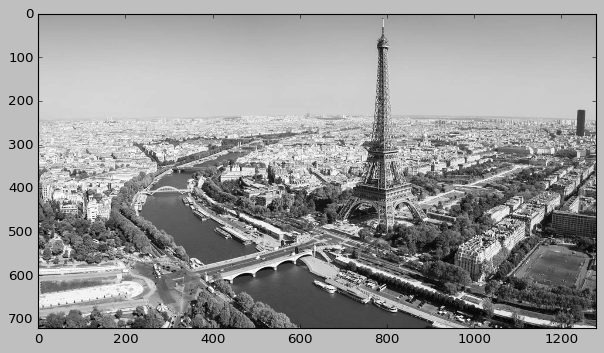

<PIL.Image.Image image mode=LA size=1280x720 at 0x7FDFA2274FD0>


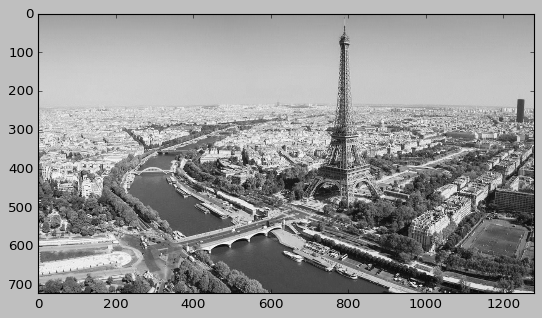

In [140]:
#imagen 2
img2 = Image.open(urllib.request.urlopen('https://viajes.nationalgeographic.com.es/medio/2022/07/13/paris_37bc088a_1280x720.jpg')).convert('LA')
imggray = img2.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)
print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap = 'gray')
plt.show()
print(img2)

U,D,V = np.linalg.svd(imgmat)
imgmat.shape
nvalue = 350

## Con 100, la imagen pierde claridad en la foto, no está capturando la luz de la imagen.
## Con valores de 100-300 no mejora la imagen, se mantiene oscura en partes donde predomina el blanco.
## En 350 se empieza a aclarar la imagen alrededor de la Torre Eiffel y captura mejor los tonos blancos y negros. 



#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])


        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg, cmap = 'gray')
plt.show()

[ 11.  10.   8. ... 165. 166. 167.]


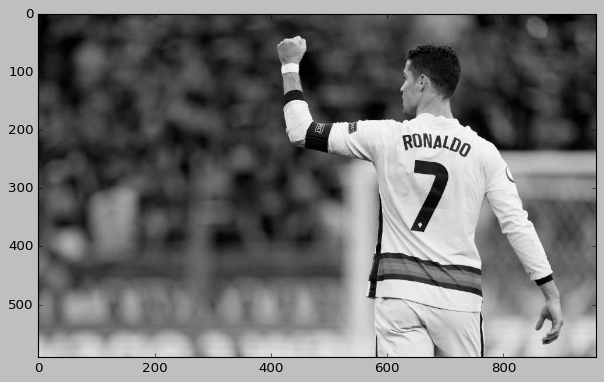

<PIL.Image.Image image mode=LA size=960x590 at 0x7FDFA24BCFD0>


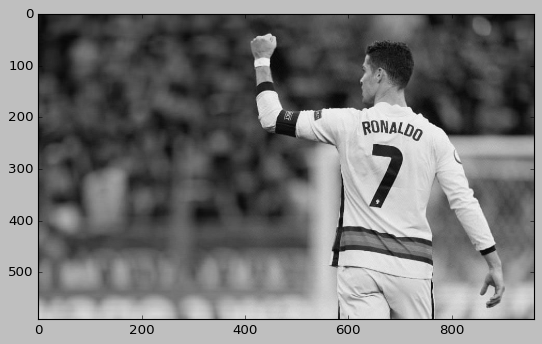

In [154]:
#imagen 3
img2 = Image.open(urllib.request.urlopen('https://www.diariogol.com/wp-content/uploads/2021/06/Cristiano-Ronaldo.jpg-960x590.jpg')).convert('LA')
imggray = img2.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)
print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap = 'gray')
plt.show()
print(img2)

U,D,V = np.linalg.svd(imgmat)
imgmat.shape
nvalue = 150

## Con un valor de 50, el blanco no llega al tono adecuado, agarra un tono gris (con algunas manchas plomas), por lo cual debemos aumentar el valor de n.
##Con 150 podemos notar que ya no existen espacios plomos en los tonos de blanco. En general se mantienen las características de la imagen original. 



#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])


        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg, cmap = 'gray')
plt.show()

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X) #Paso importante para realizar cualquier PCA, estandarizar datos caso contrario los componentes tendrán información erronea. 
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) 

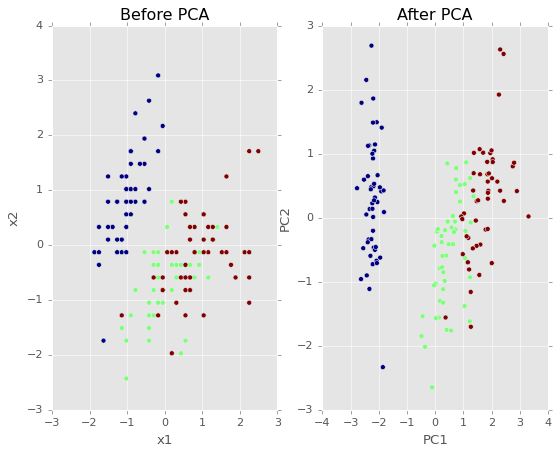

In [64]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

##Gráfico de PCA Score. Aquí se nota la estandarización de los datos una vez realizado el PCA. 

In [65]:
print(pca.explained_variance_ratio_)
#Estos dos componentes Explican el 95% de la variabilidad de todos las variables incluidas 

[0.72962445 0.22850762]


In [67]:
np.cov(X_new.T)


array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [68]:
pca.explained_variance_
## Este valor sirve para comprobar que no existe pérdida de información después de realizar el PCA. Esto también podría comprobarse sumando la varianza de nuestras variables y la varianza después del PCA 
##El valor debe mantenerse igual, caso contrario existió pérdida de información, lo cual es un problema.

array([2.93808505, 0.9201649 ])

In [141]:
print(abs( pca.components_ ))
## Determinar la importancia de las variables en cada componente, como menciona el ejemplo, en este caso la variable 1, 3 y 4 son las mas imporantes dentro del primer componente

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [70]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

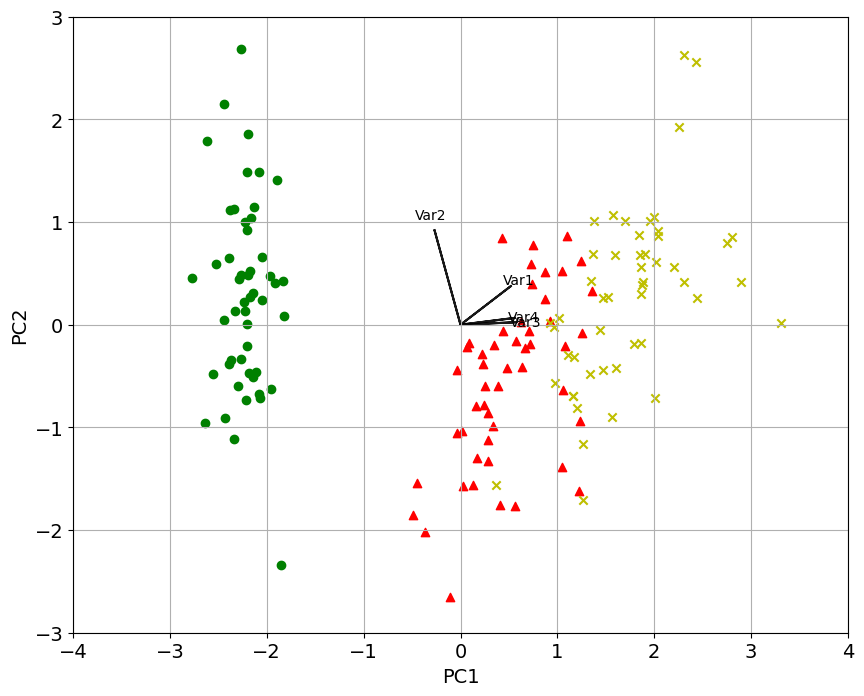

In [71]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) #

biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

En la gráfico podemos ver la importancia de cada variable en los componentes. En el primer componente la variable 2 no tiene mucha importancia mientras que las otras variables muestran similares valores de importancia (mayores que la variable 2). Mientras que en el segundo componente podemos ver la importancia de la variable 2 y la variable 1. Esto se observa por la dirección de las flechas que se incluyen en el gráfico. 

In [74]:
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [75]:
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

La importancia de realizar un PCA radica en la reducción de dimensionalidad de una base de datos. En ocasiones podemos tener una gran cantidad de variables que se relacionan entre sí y podrían generar multicolinealidad dentro de nuestro modelo/regresión. Con el PCA, aplicamos componentes que agrupan a las variables y ayudan a reducir la dimensionalidad de nuestra base de datos.
Es importante mencionar que al realizar un PCA se están utilizando todas las variables y todos los registros.

En este ejercicio, el autor coloca el código, pero no menciona la importancia de estandarizar los datos para poder realizar el PCA. Esto evita que existan malas interpretaciones en cuanto a la varianza e importancia de los componentes.
 
En este caso contamos con 4 variables y con nuestro PCA lo reducimos a 2 componentes que explican el 95% de la variabilidad de estos datos.
Observando la importancia de cada variable dentro del primer componente notamos que la variable 3 es la que tiene mayor importancia (seguido por la variable 1 y 4 por pequeñas diferencias). Mientras que en el segundo componente, la variable 2 es la de mayor importancia con la variable 1. Una nota importante, no podemos argumentar que una variable es más importante que otra en el PCA, dado que este análisis se debe hacer por cada componente (como ejemplo, la variable 2 no es relevante en el primer componente, pero sí es importante en el segundo), lo que podemos asegurar es la importancia de cada componente. 

